In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


>TotalCharges is having object as dtype but in columns it has numbers -> this implies it has some invalid or empty string or "343" . 

In [5]:
check_numeric = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [6]:
problem_rows = df[check_numeric.isna()]

In [7]:
problem_rows.shape[0]

11

In [8]:
problem_rows['TotalCharges'].unique()

array([' '], dtype=object)

>Now just connect it to data and see if its showing anything or expected

In [9]:
problem_rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


> Questions (Raw)
1. does tenure = 0  imply that the customer will churn 
2. how does each column look like is it balanced , skewed 
3. is the proportion of all categories in data almost comparable like it should not be 99 to 1 
4. Are there any missing values , or if its categorical but any invalid or empty character in columns 
5. what is the relationship btw monthly charge , total charge and churn (i think there would be something)
6. also i want to see at what cost is the churn more likely like if the bill is more then is churn yes / no
7. Relationship between contract and churn 
8. number of services a customer is having and the relation with target
9. relationship of partner and dependeant with churn 
10. also i think partner and dependant would be merged to make one column ig . like i dont know the dependant meaning

>✅ FINAL EDA QUESTION LIST (USE THIS)

1️⃣ Target & Imbalance

Q1. Is churn rare or common in this dataset?
→ Impacts metric choice immediately.

2️⃣ Tenure (Critical)

Q2. How does churn probability change with tenure?
→ Especially: are new customers at higher risk?

3️⃣ Tenure Edge Case

Q3. Do customers with tenure = 0 churn disproportionately, and why?
→ This tests whether churn is tied to onboarding failure.

4️⃣ Pricing Effect

Q4. Is higher monthly cost associated with higher churn?
→ Tests price sensitivity.

5️⃣ Billing Structure

Q5. How do MonthlyCharges and TotalCharges together relate to churn?
→ Helps detect misleading signals and leakage risk.

6️⃣ Contract Commitment

Q6. How does contract type (month-to-month vs long-term) affect churn?
→ One of the strongest real-world churn drivers.

7️⃣ Service Stickiness

Q7. Does the number of services a customer uses reduce churn risk?
→ Tests customer lock-in.

8️⃣ Specific Services

Q8. Are there particular services whose absence or presence increases churn?
→ Helps decide feature importance later.

9️⃣ Household Context

Q9. Do customers with partners or dependents churn less than others?
→ Social stability hypothesis.

🔟 Data Quality / Leakage

Q10. Are there features that are suspiciously predictive or unavailable at prediction time?
→ Protects you from fake performance.

-----

# 1️⃣ Target & Imbalance
Q1. Is churn rare or common in this dataset?
→ Impacts metric choice immediately.

In [10]:
sns.set_theme(style='darkgrid',context='talk')

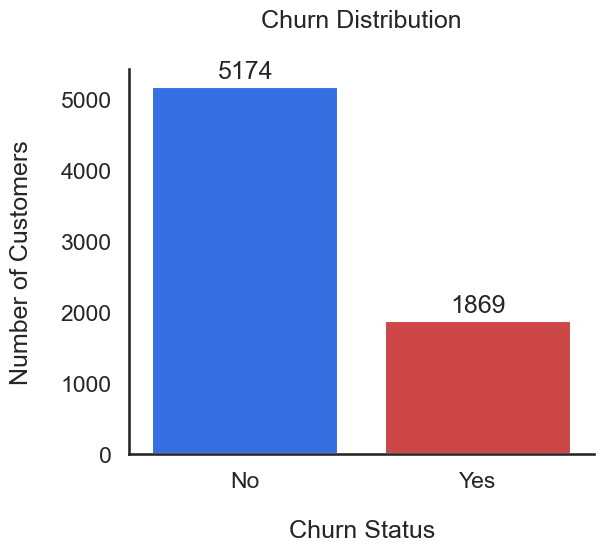

In [11]:
sns.set_theme(style='white', context='talk')


custom_colors = ["#1965ff", "#e33131"]


plt.figure(figsize=(6, 5))
ax = sns.countplot(x='Churn',hue='Churn', data=df, palette=custom_colors)


sns.despine(top=True, right=True)


for c in ax.containers: 
    ax.bar_label(c, padding=3)


plt.title("Churn Distribution", pad=30)
plt.xlabel('Churn Status', labelpad=20)      
plt.ylabel('Number of Customers', labelpad=20) 

plt.show()

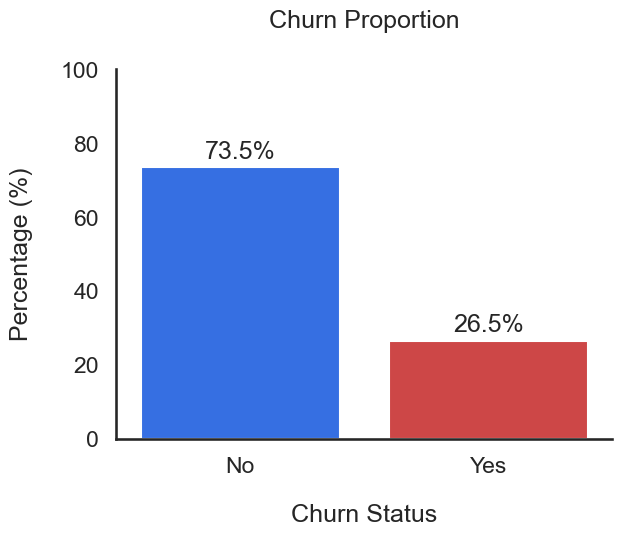

In [12]:
props= (df['Churn'].value_counts(normalize=True)*100).reset_index()

ax = sns.barplot(x='Churn',data=props,y='proportion',hue='Churn',palette=custom_colors,legend=False)

sns.despine(top=True,right=True)
for c in ax.containers:
    ax.bar_label(container=c,fmt='%.1f%%',padding=3)

plt.title("Churn Proportion", pad=30)
plt.ylabel("Percentage (%)", labelpad=20)
plt.xlabel("Churn Status", labelpad=20)
plt.ylim(0, 100)
plt.show()

## Churn is imbalanced : ~26% churn rate 
### Accuracy alone is not the metric : need ROC/AUC , Precision/recall

# 2️⃣ Tenure (Critical)

Q2. How does churn probability change with tenure?
→ Especially: are new customers at higher risk?

In [13]:
tenure_churn = df[['tenure','Churn']]
tenure_churn

,tenure,Churn
0,1,No
1,34,No
2,2,Yes
3,45,No
4,2,Yes
...,...,...
7038,24,No
7039,72,No
7040,11,No
7041,4,Yes


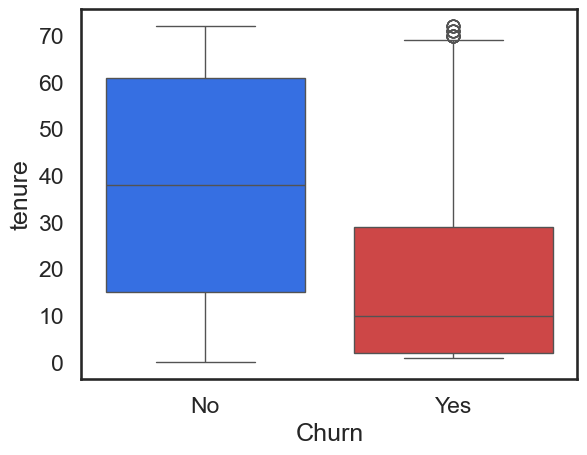

In [14]:
sns.boxplot(x='Churn',y='tenure',data=df,palette=custom_colors,hue='Churn')
plt.show()

In [15]:
print(df.groupby('Churn')['tenure'].describe())

        count       mean        std  min   25%   50%   75%   max
Churn                                                           
No     5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
Yes    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0


## Tenure of churn=yes is lower , that means customer with less tenure are likely to leave 
## little overlap , of two boxes , overlap btw 15 to 29 months 
## loyal customers stay for longer durations 


# 3️⃣ Tenure Edge Case

Q3. Do customers with tenure = 0 churn disproportionately, and why?
→ This tests whether churn is tied to onboarding failure.

In [16]:
# Need to find proportions of churn=Yes poeple , btw tenure = 0 and else 

overall_churn_rate = df['Churn']=='Yes'


overall_churn_rate = (df['Churn'] == 'Yes').mean()
tenure_0 = df[df['tenure'] == 0]
tenure_0_churn_rate = (tenure_0['Churn'] == 'Yes').mean()
overall_churn_rate, tenure_0_churn_rate, tenure_0.shape[0]


(np.float64(0.2653698707936959), np.float64(0.0), 11)

In [17]:

zero_tenure_df = df[df['tenure'] == 0]
overall_churn_rate= (df['Churn'] == 'Yes').mean()

zero_tenure_rate= (zero_tenure_df['Churn']=='Yes').mean()

In [18]:
overall_churn_rate , zero_tenure_rate

(np.float64(0.2653698707936959), np.float64(0.0))

# 4️⃣ Pricing Effect

Q4. Is higher monthly cost associated with higher churn?
→ Tests price sensitivity.

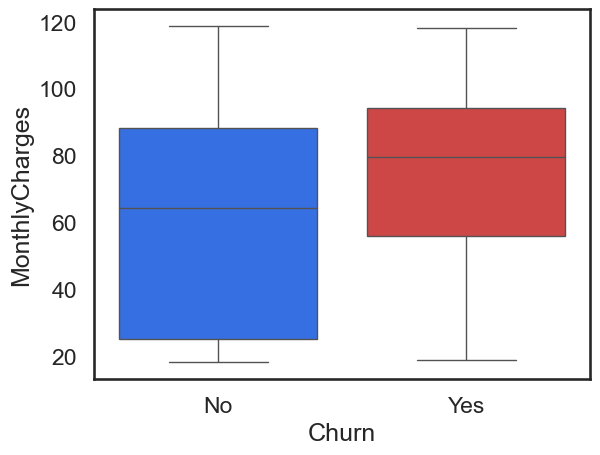

In [19]:
sns.boxplot(x='Churn',
            y='MonthlyCharges',
            data=df,
            palette=custom_colors,
            hue='Churn')
plt.show()

In [20]:
print(df.groupby('Churn')["MonthlyCharges"].describe())

        count       mean        std    min    25%     50%   75%     max
Churn                                                                  
No     5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75
Yes    1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35


boxes overlap very much (56.15 to 88.4)
median shows that churners have higher cost than retainers 
also most of the retainers have low cost than churners as per the boxes 
this implies that i just cannot only consider monthlyprice as the only feature that shows if its a churner 

# 5️⃣ Billing Structure

Q5. How do MonthlyCharges and TotalCharges together relate to churn?
→ Helps detect misleading signals and leakage risk.

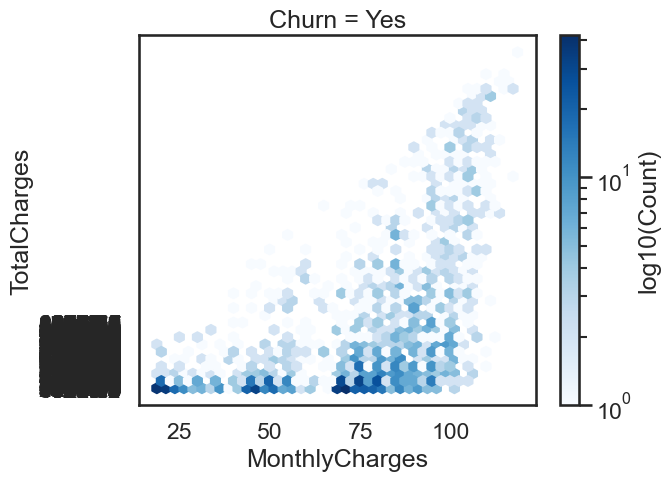

ValueError: could not convert string to float: ' '

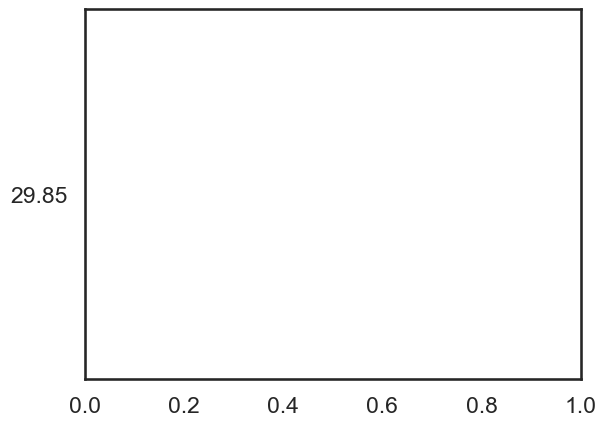

In [21]:
for label in ['Yes', 'No']:
    subset = df[df['Churn'] == label]
    plt.hexbin(
        subset['MonthlyCharges'],
        subset['TotalCharges'],
        gridsize=40,
        bins='log',
        cmap='Blues'
    )
    plt.title(f'Churn = {label}')
    plt.xlabel('MonthlyCharges')
    plt.ylabel('TotalCharges')
    plt.colorbar(label='log10(Count)')
    plt.show()


In [ ]:
i can see that monthlycharges and total charges have diagonal relationship for churn = no 
and for churn = yes i dont see that much of it and density is more towaredds x axis horizontaly
this gives that totalCharge is actually telling us the tenure and retentiont time 

# 6️⃣ Contract Commitment

Q6. How does contract type (month-to-month vs long-term) affect churn?
→ One of the strongest real-world churn drivers.

In [ ]:
df.Contract.value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

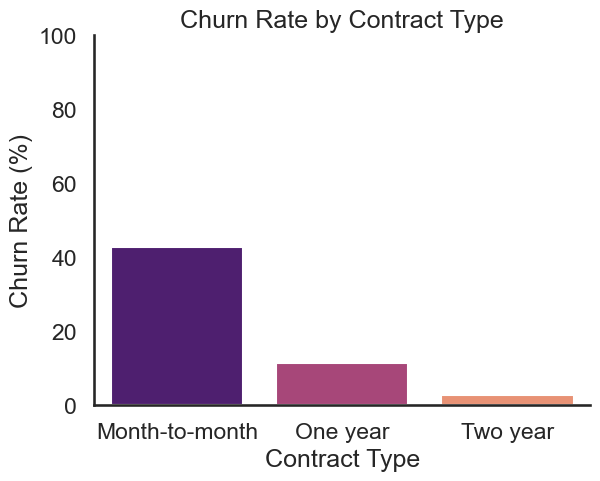

In [43]:
# compute churn rate per contract
contract_churn_rate = (
    df.groupby('Contract')['Churn']
      .apply(lambda x: (x == 'Yes').mean() * 100)
      .reset_index(name='ChurnRate')
)

# plot
sns.barplot(
    data=contract_churn_rate,
    x='Contract',
    y='ChurnRate',
    palette='magma',
    hue = 'Contract'
)

plt.ylabel('Churn Rate (%)')
plt.xlabel('Contract Type')
plt.title('Churn Rate by Contract Type')
plt.ylim(0, 100)
sns.despine()
plt.show()

# 7️⃣ Service Stickiness

Q7. Does the number of services a customer uses reduce churn risk?
→ Tests customer lock-in.







C:\Users\devav\AppData\Local\Temp\ipykernel_20560\3866085339.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


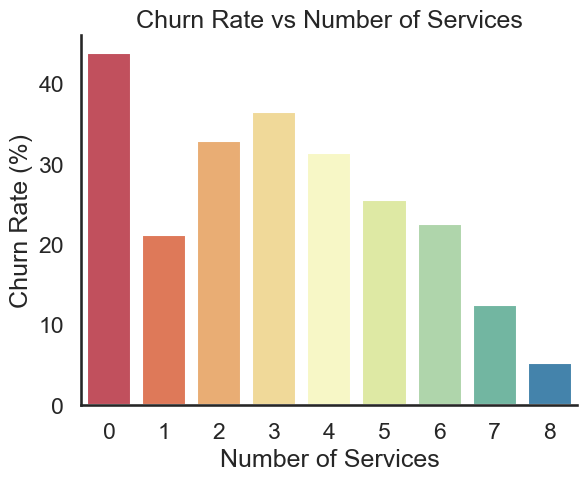

In [47]:
service_cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

df['num_services']= df[service_cols].apply(
    lambda x:(x=='Yes').sum(),axis=1
)

service_churn = (
    df.groupby('num_services')['Churn'].apply(
        lambda x : (x=='Yes').mean()*100
    ).reset_index(name='ChurnRate')
)


sns.barplot(
    data=service_churn,
    x='num_services',
    y='ChurnRate',
    palette='Spectral'
)
plt.xlabel('Number of Services')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate vs Number of Services')
sns.despine()
plt.show()


churn rate drops significantly from 0 service to 1 service . then from 1 to 3 service the churn rate increases and from 3 it decreases. it also tells that having a higher number of services like 7,8 will result in lower churn rate

# 8️⃣ Specific Services

Q8. Are there particular services whose absence or presence increases churn?
→ Helps decide feature importance later.

In [48]:
service_cols = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

rows = []

for service in service_cols:
    churn_yes = (df[df[service] == 'Yes']['Churn'] == 'Yes').mean()
    churn_no  = (df[df[service] == 'No']['Churn'] == 'Yes').mean()
    
    rows.append({
        'Service': service,
        'ChurnRateDiff': (churn_no - churn_yes) * 100
    })

service_effect = pd.DataFrame(rows).sort_values('ChurnRateDiff')


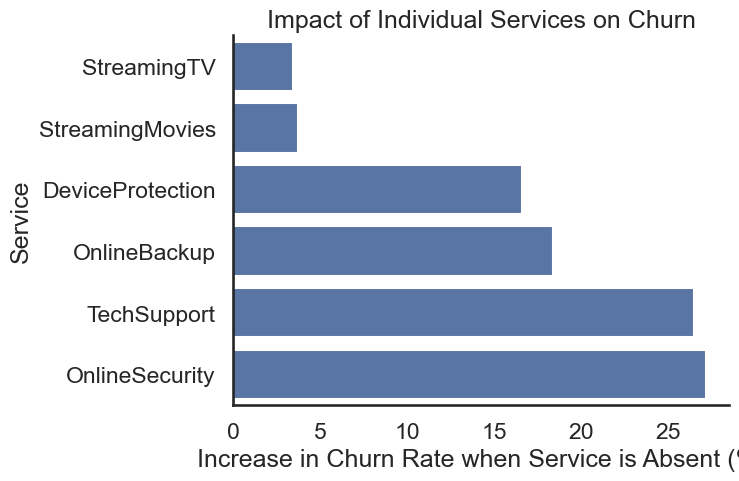

In [49]:

sns.barplot(
    data=service_effect,
    x='ChurnRateDiff',
    y='Service'
)
plt.axvline(0, color='black', linewidth=1)
plt.xlabel('Increase in Churn Rate when Service is Absent (%)')
plt.ylabel('Service')
plt.title('Impact of Individual Services on Churn')
sns.despine()
plt.show()


# 9️⃣ Household Context

Q9. Do customers with partners or dependents churn less than others?
→ Social stability hypothesis.

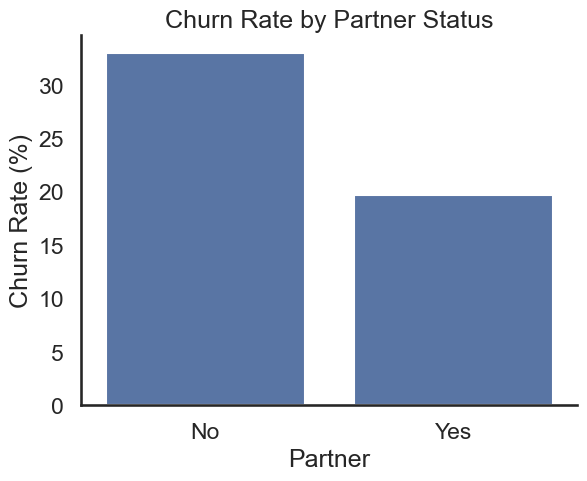

In [50]:
partner_churn = (
    df.groupby('Partner')['Churn']
      .apply(lambda x: (x == 'Yes').mean() * 100)
      .reset_index(name='ChurnRate')
)

sns.barplot(
    data=partner_churn,
    x='Partner',
    y='ChurnRate'
)
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Partner Status')
sns.despine()
plt.show()


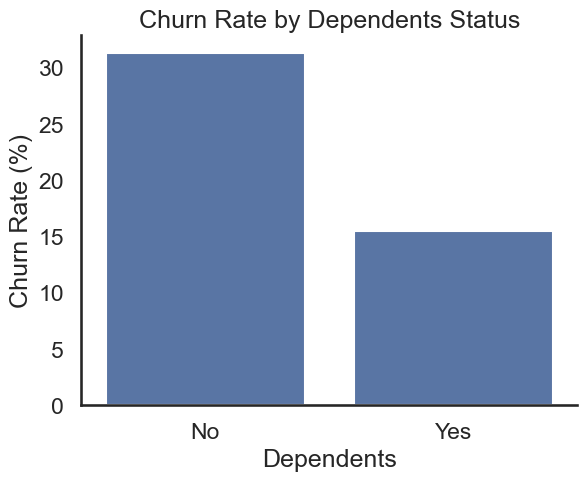

In [52]:
dependants_churn = (
    df.groupby('Dependents')['Churn'].apply(
        lambda x : (x=='Yes').mean()*100
    ).reset_index(name='ChurnRate')
)


sns.barplot(data=dependants_churn,
            x='Dependents',
            y='ChurnRate')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Dependents Status')
sns.despine()
plt.show()

# 🔟 Data Quality / Leakage

Q10. Are there features that are suspiciously predictive or unavailable at prediction time?
→ Protects you from fake performance.

In [ ]:
# tenure and total charges encode survival time and may partially leak outcome information